<a href="https://colab.research.google.com/github/rociotarda/TP1---Datos/blob/main/AnalisisExploratorioRocio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_labels.csv to train_labels.csv
Saving train_values.csv to train_values.csv


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import io
from scipy.stats import gaussian_kde

In [ ]:
df_train_labels = pd.read_csv(io.BytesIO(uploaded['train_labels.csv']))
df_train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [ ]:
df_train_values = pd.read_csv(io.BytesIO(uploaded['train_values.csv']))
df_train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Mergeo ambas tablas
train_values_with_train_labels = df_train_labels.merge(df_train_values, on='building_id', how='inner')
train_values_with_train_labels

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Daño por geo level 1

# Ver que los que no tienen mas del 10% del maximo de cantidad, no me parece que haya que tenerlos en cuenta

damage_per_geo_level1 =  train_values_with_train_labels.groupby('geo_level_1_id').agg({'damage_grade': ['mean','count']})
damage_per_geo_level1.columns = damage_per_geo_level1.columns.get_level_values(0) + '_' + damage_per_geo_level1.columns.get_level_values(1)
damage_per_geo_level1.reset_index(inplace=True)
damage_per_geo_level1.sort_values('damage_grade_count',ascending=False)
top_10 = damage_per_geo_level1.nlargest(10,'damage_grade_count')
less_10 = damage_per_geo_level1.nsmallest(10,'damage_grade_count')


Text(0.5, 1.0, 'Buildings geo level 1 vs. Damage grade')

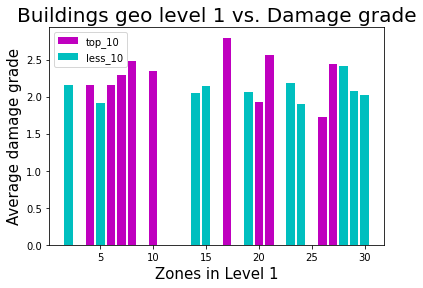

In [ ]:
#Visualizacion

#grafico=top_10['damage_grade_mean'].plot(kind='bar',color=['pink'], figsize=(20,10))
x1 = top_10.index
y1 = top_10['damage_grade_mean']
x2 = less_10.index
y2 = less_10['damage_grade_mean']
plt.bar(x1, y1, label="top_10", color='m')
plt.bar(x2, y2, label="less_10", color='c')

#plt.bar(x1, y1, label="Average damage ", color='pink')
plt.xlabel("Zones in Level 1", size=15)
plt.ylabel("Average damage grade", size=15)
plt.xticks(rotation=0)
plt.legend(fancybox=True)
plt.title("Buildings geo level 1 vs. Damage grade", size = 20)

#leyenda=plt.legend(['Damage grade],frameon=True,facecolor='white',edgecolor='black')

In [114]:
# Daño por geo level 2

# Ver que los que no tienen mas del 10% del maximo de cantidad, no me parece que haya que tenerlos en cuenta
damage_per_geo_level2 =  train_values_with_train_labels.groupby('geo_level_2_id').agg({'damage_grade': ['mean','count']})
damage_per_geo_level2.columns = damage_per_geo_level2.columns.get_level_values(0) + '_' + damage_per_geo_level2.columns.get_level_values(1)
damage_per_geo_level2.reset_index(inplace=True)
damage_per_geo_level2.sort_values('damage_grade_mean',ascending=False)
top_10_geo_level2 = damage_per_geo_level2.nlargest(50,'damage_grade_mean')
#less_10_geo_level2 = damage_per_geo_level2.nsmallest(10,'damage_grade_count')
top_10_geo_level2


,geo_level_2_id,damage_grade_mean,damage_grade_count
76,77,3.000000,1
77,78,3.000000,2
222,224,3.000000,2
315,319,3.000000,1
321,325,3.000000,3
357,361,3.000000,1
388,392,3.000000,1
499,505,3.000000,1
503,509,3.000000,5
518,524,3.000000,6


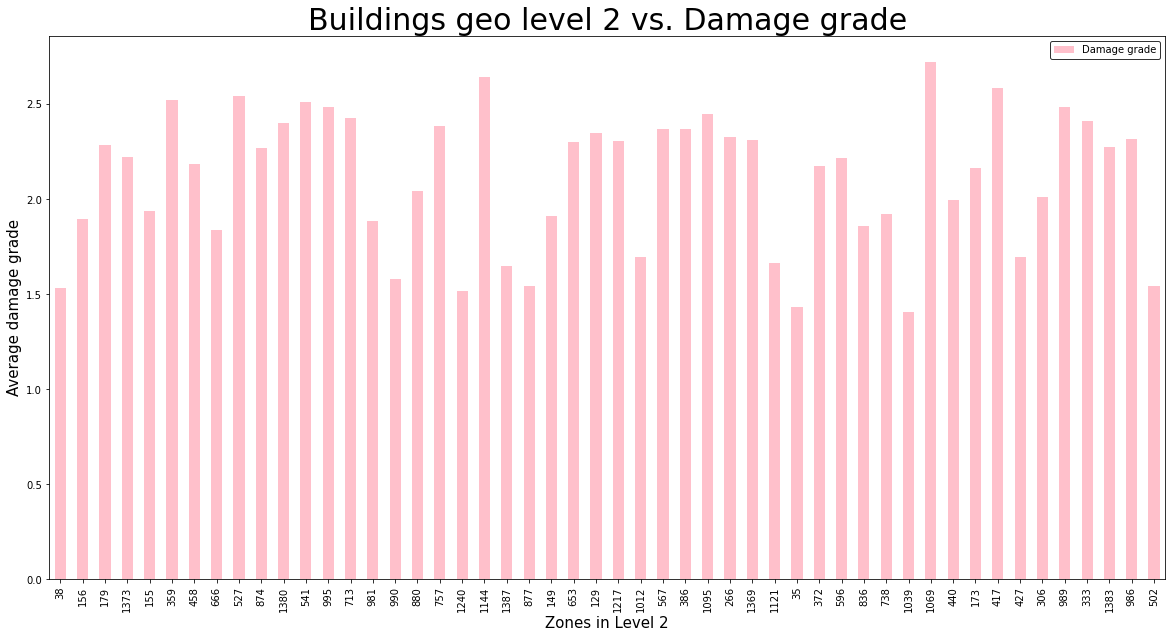

In [112]:
#Visualizacion
grafico=top_10_geo_level2['damage_grade_mean'].plot(kind='bar',color=['pink'], figsize=(20,10))
plt.xlabel("Zones in Level 2", size=15)
plt.ylabel("Average damage grade", size=15)
#plt.xticks(rotation=)
plt.legend(fancybox=True)
plt.title("Buildings geo level 2 vs. Damage grade", size = 30)
leyenda=plt.legend(['Damage grade'],frameon=True,facecolor='white',edgecolor='black')

In [ ]:
# Daño por geo level 3

# Ver que los que no tienen mas del 10% del maximo de cantidad, no me parece que haya que tenerlos en cuenta
damage_per_geo_level3 =  train_values_with_train_labels.groupby('geo_level_3_id').agg({'damage_grade': ['mean','count']})
damage_per_geo_level3.columns = damage_per_geo_level3.columns.get_level_values(0) + '_' + damage_per_geo_level3.columns.get_level_values(1)
damage_per_geo_level3.reset_index(inplace=True)
damage_per_geo_level3.head(5)

,geo_level_3_id,damage_grade_mean,damage_grade_count
0,0,3.000000,2
1,1,2.500000,6
2,3,1.888889,9
3,5,1.142857,14
4,6,2.523810,21


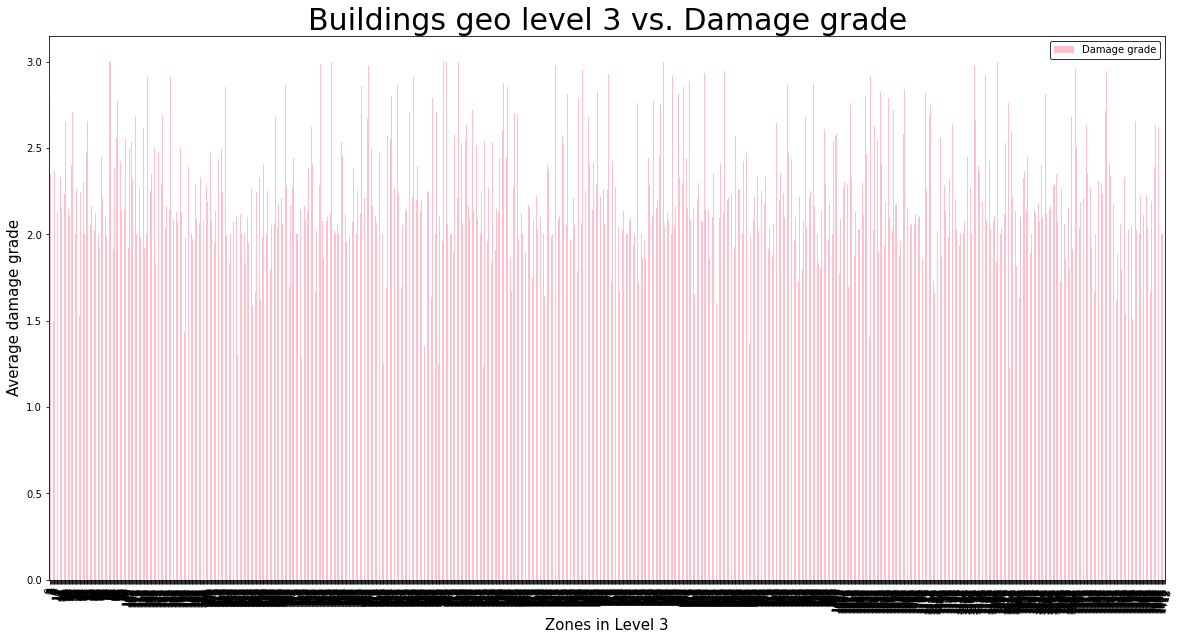

In [ ]:
#Visualizacion
grafico=damage_per_geo_level2['damage_grade_mean'].plot(kind='bar',color=['pink'], figsize=(20,10))
plt.xlabel("Zones in Level 3", size=15)
plt.ylabel("Average damage grade", size=15)
plt.xticks(rotation=75)
plt.legend(fancybox=True)
plt.title("Buildings geo level 3 vs. Damage grade", size = 30)
leyenda=plt.legend(['Damage grade'],frameon=True,facecolor='white',edgecolor='black')

In [ ]:
#Me fijo el material de las edificaciones que son unicas en el geo level 3
unique_buildings_in_geo_level_3 = damage_per_geo_level3[damage_per_geo_level3['damage_grade_count']== 1]
unique_buildings_in_geo_level_3.sort_values('damage_grade_mean',ascending=False)

,geo_level_3_id,damage_grade_mean,damage_grade_count
5822,6303,3.0,1
8650,9364,3.0,1
8671,9388,3.0,1
8689,9408,3.0,1
3562,3856,3.0,1
...,...,...,...
3953,4277,1.0,1
2921,3152,1.0,1
9426,10215,1.0,1
6191,6694,1.0,1


In [ ]:
train_values_with_train_labels

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [121]:
col_rename1 = {'has_superstructure_adobe_mud':'adobe_mud','has_superstructure_mud_mortar_stone':'mud_mortar_stone','has_superstructure_stone_flag':'stone_flag',\
              'has_superstructure_cement_mortar_stone':'cement_mortar_stone','has_superstructure_mud_mortar_brick':'mud_mortar_brick','has_superstructure_cement_mortar_brick':'cement_mortar_brick',\
              'has_superstructure_timber':'timber','has_superstructure_bamboo':'bamboo','has_superstructure_rc_non_engineered':'rc_non_engineered','has_superstructure_rc_engineered':'rc_engineered',\
              'has_superstructure_other':'other'}
materials = (train_values_with_train_labels.rename(columns= col_rename1).iloc[:,16:27])
materials_vs_damage_mean = materials.apply(lambda x: np.asarray(x) * np.asarray(train_values_with_train_labels['damage_grade']))\
                              .apply(lambda x: x.replace(0, np.NaN))\
                              .apply(lambda x: np.asarray(x.dropna()).mean())

col_rename2 = {0:'damage_grade'}
materials_vs_damage_mean_df = materials_vs_damage_mean.to_frame().rename(columns= col_rename2)
materials_vs_damage_mean_df


,damage_grade
adobe_mud,2.346782
mud_mortar_stone,2.337901
stone_flag,2.452554
cement_mortar_stone,1.967593
mud_mortar_brick,2.271212
cement_mortar_brick,1.693296
timber,2.165222
bamboo,2.111718
rc_non_engineered,1.779530
rc_engineered,1.375514


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

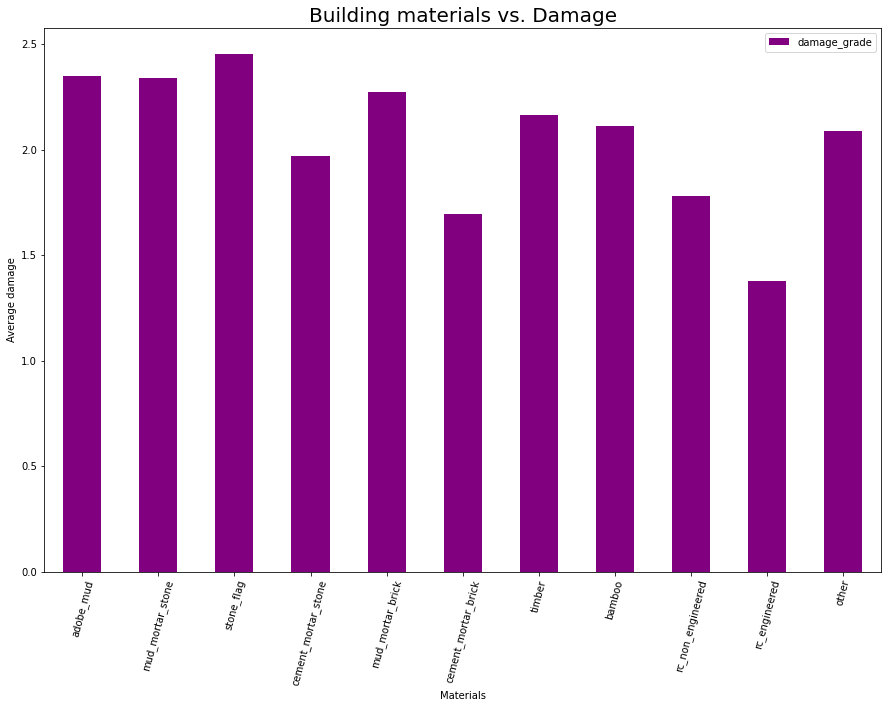

In [147]:
materials_vs_damage_mean_df.plot.bar(stacked=True, figsize=(15,10), color=['purple'])

plt.title("Building materials vs. Damage", size = 20)
plt.xlabel("Materials", size=10)
plt.ylabel("Average damage", size=10)

plt.xticks(rotation=75)

In [148]:
#Visualizacion

#plot=materials_vs_damage_mean_df.index.value_counts().sort_values(ascending=True).plot(kind='bar',color=['pink'], figsize=(20,10))
#plt.xlabel("Materials", size=15)
#plt.ylabel("Average damage", size=15)
#plt.legend(fancybox=True)
#plt.xticks(rotation=0)
#plt.title("Building materials vs. Damage", size = 30)
#leyenda=plt.legend(['damage_grade'],frameon=True,facecolor='white',edgecolor='black')



#x1 = materials_vs_damage_mean_df.index
#y1 = materials_vs_damage_mean_df['damage_grade']

#plt.bar(x1, y1, label="Average damage ", color='pink')
#plt.plot()

#plt.xlabel("Materials", size=15)
#plt.xticks(rotation=75)
#plt.ylabel("Average damage", size=15)
#plt.title("Building materials vs. Damage", size = 20)
#plt.legend(fancybox=True)
#plt.show()

In [ ]:
col_rename1 = {'has_superstructure_adobe_mud':'adobe_mud','has_superstructure_mud_mortar_stone':'mud_mortar_stone','has_superstructure_stone_flag':'stone_flag',\
              'has_superstructure_cement_mortar_stone':'cement_mortar_stone','has_superstructure_mud_mortar_brick':'mud_mortar_brick','has_superstructure_cement_mortar_brick':'cement_mortar_brick',\
              'has_superstructure_timber':'timber','has_superstructure_bamboo':'bamboo','has_superstructure_rc_non_engineered':'rc_non_engineered','has_superstructure_rc_engineered':'rc_engineered',\
              'has_superstructure_other':'other'}
#materials = (train_values_with_train_labels.rename(columns= col_rename1).iloc[:,16:27])
materials_and_age_mean = materials.apply(lambda x: np.asarray(x) * np.asarray(train_values_with_train_labels['age']))\
                              .apply(lambda x: x.replace(0, np.NaN))\
                              .apply(lambda x: np.asarray(x.dropna()).mean())

col_rename2 = {0:'age_buildings'}
materials_and_age_mean_df = materials_and_age_mean.to_frame().rename(columns= col_rename2)
materials_and_age_mean_df


,age_buildings
adobe_mud,43.917139
mud_mortar_stone,28.801067
stone_flag,33.153780
cement_mortar_stone,24.101751
mud_mortar_brick,49.528455
cement_mortar_brick,22.380840
timber,30.362911
bamboo,27.998144
rc_non_engineered,22.731594
rc_engineered,17.735090


In [153]:
materials_age_damage_grade = materials_and_age_mean_df.merge(materials_vs_damage_mean_df ,on=materials_vs_damage_mean_df.index,how='inner')
materials_age_damage_grade = materials_age_damage_grade.set_index('key_0')
materials_age_damage_grade

,age_buildings,damage_grade
key_0,,
adobe_mud,43.917139,2.346782
mud_mortar_stone,28.801067,2.337901
stone_flag,33.153780,2.452554
cement_mortar_stone,24.101751,1.967593
mud_mortar_brick,49.528455,2.271212
cement_mortar_brick,22.380840,1.693296
timber,30.362911,2.165222
bamboo,27.998144,2.111718
rc_non_engineered,22.731594,1.779530


TypeError: ignored

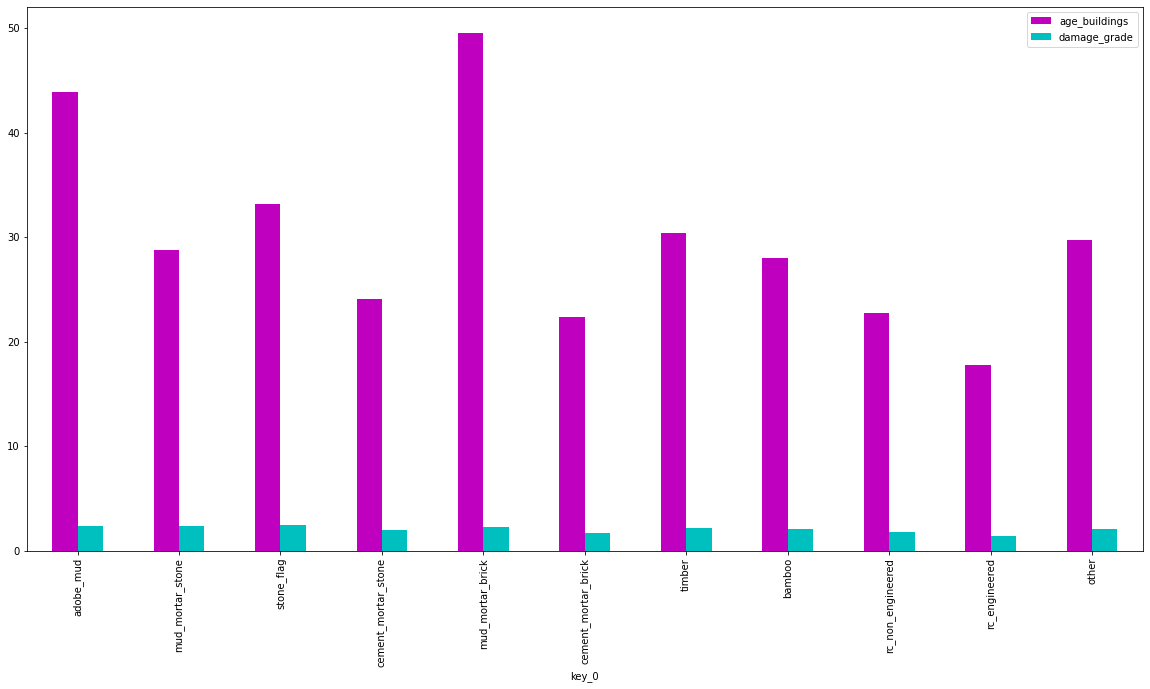

In [159]:
grafico=materials_age_damage_grade.plot(kind='bar',color=['m','c'], figsize=(20,10))
grafico.
grafico.set_xlabel("age_buildings", size = 10)
grafico.set_ylabel("damage_grade", size = 10)
leyenda=plt.legend(['Personas vacunadas con 1 dosis','Personas vacunadas con ambas \
  dosis'],frameon=True,facecolor='white',edgecolor='black')

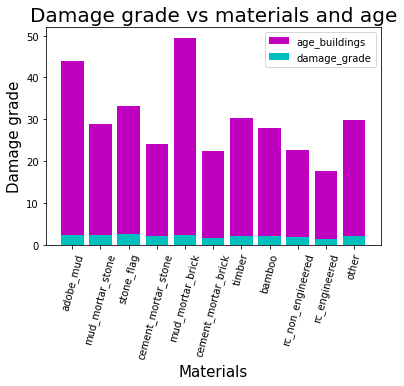

In [ ]:
x1 = materials_age_damage_grade['key_0']
y1 = materials_age_damage_grade['age_buildings']
x2 = materials_age_damage_grade['key_0']
y2 = materials_age_damage_grade['damage_grade']
plt.bar(x1, y1, label="age_buildings", color='m')
plt.bar(x2, y2, label="damage_grade", color='c')
plt.plot()

plt.xlabel("Materials", size=15)
plt.xticks(rotation=75)
plt.ylabel("Damage grade", size=15)
plt.title("Damage grade vs materials and age", size = 20)
plt.legend(fancybox=True)
plt.show()

In [ ]:
# COSAS EXTRAS - PRUEBAS

In [ ]:
material_vs_damage = train_values_with_train_labels.groupby(['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', \
                                                        'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick','has_superstructure_timber', 'has_superstructure_bamboo',\
                                                        'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']).agg({'damage_grade': 'mean'})
material_vs_damage.reset_index(inplace=True)
#geo_vs_damage1 = geo_vs_damage.set_index('damage_grade')
#geo_vs_damage = geo_vs_damage.set_index('damage_grade',inplace=True)
#geo_vs_damage_pivot = geo_vs_damage.pivot_table(index = geo_vs_damage.columns, values=geo_vs_damage.index )
# usar apply al damage grade mean en vez del group by
material_vs_damage

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,0,0,0,0,0,0,0,0,0,0,1,1.622807
1,0,0,0,0,0,0,0,0,0,1,0,1.334233
2,0,0,0,0,0,0,0,0,0,1,1,2.250000
3,0,0,0,0,0,0,0,0,1,0,0,1.471322
4,0,0,0,0,0,0,0,0,1,0,1,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
500,1,1,1,1,1,0,1,1,0,0,1,3.000000
501,1,1,1,1,1,1,0,0,0,0,0,1.000000
502,1,1,1,1,1,1,0,0,1,0,0,2.000000
503,1,1,1,1,1,1,1,0,0,0,0,2.000000


In [ ]:
df1 = (material_vs_damage.iloc[:,:11])
#func = lambda x: np.asarray(x) * np.asarray('damage_grade')
df = df1.apply(lambda x: np.asarray(x) * np.asarray(material_vs_damage['damage_grade']))
df

In [ ]:
# has_superstructure_adobe_mud
mean_adobe_mud_vs_damage = material_vs_damage[['has_superstructure_adobe_mud','damage_grade']].groupby('has_superstructure_adobe_mud').agg({'damage_grade': 'mean'})
mean_adobe_mud_vs_damage.reset_index(inplace=True)

adobe_mud_vs_damage = mean_adobe_mud_vs_damage.loc[mean_adobe_mud_vs_damage['has_superstructure_adobe_mud']== 1, ['has_superstructure_adobe_mud', 'damage_grade']]
adobe_mud_vs_damage['has_superstructure_adobe_mud'] = "has_superstructure_adobe_mud"
adobe_mud_vs_damage

In [ ]:
# has_superstructure_mud_mortar_stone
mean_mud_mortar_stone_vs_damage = material_vs_damage[['has_superstructure_mud_mortar_stone','damage_grade']].groupby('has_superstructure_mud_mortar_stone').agg({'damage_grade': 'mean'})
mean_mud_mortar_stone_vs_damage.reset_index(inplace=True)
mud_mortar_stone_vs_damage = mean_mud_mortar_stone_vs_damage.loc[mean_mud_mortar_stone_vs_damage['has_superstructure_mud_mortar_stone']== 1, ['has_superstructure_mud_mortar_stone', 'damage_grade']]
mud_mortar_stone_vs_damage

In [ ]:
# has_superstructure_stone_flag
mean_stone_flag_vs_damage = material_vs_damage[['has_superstructure_stone_flag','damage_grade']].groupby('has_superstructure_stone_flag').agg({'damage_grade': 'mean'})
mean_stone_flag_vs_damage.reset_index(inplace=True)
stone_flag_vs_damage = mean_stone_flag_vs_damage.loc[mean_stone_flag_vs_damage['has_superstructure_stone_flag']== 1, ['has_superstructure_stone_flag', 'damage_grade']]
stone_flag_vs_damage

In [ ]:
# has_superstructure_cement_mortar_stone
mean_cement_mortar_stone_vs_damage = material_vs_damage[['has_superstructure_cement_mortar_stone','damage_grade']].groupby('has_superstructure_cement_mortar_stone').agg({'damage_grade': 'mean'})
mean_cement_mortar_stone_vs_damage.reset_index(inplace=True)
cement_mortar_stone_vs_damage = mean_cement_mortar_stone_vs_damage.loc[mean_cement_mortar_stone_vs_damage['has_superstructure_cement_mortar_stone']== 1, ['has_superstructure_cement_mortar_stone', 'damage_grade']]
cement_mortar_stone_vs_damage

In [ ]:
# has_superstructure_mud_mortar_brick
mean_mud_mortar_brick_vs_damage = material_vs_damage[['has_superstructure_mud_mortar_brick','damage_grade']].groupby('has_superstructure_mud_mortar_brick').agg({'damage_grade': 'mean'})
mean_mud_mortar_brick_vs_damage.reset_index(inplace=True)
mud_mortar_brick_vs_damage = mean_mud_mortar_brick_vs_damage.loc[mean_mud_mortar_brick_vs_damage['has_superstructure_mud_mortar_brick']== 1, ['has_superstructure_mud_mortar_brick', 'damage_grade']]
mud_mortar_brick_vs_damage

In [ ]:
# has_superstructure_cement_mortar_brick
mean_cement_mortar_brick_vs_damage = material_vs_damage[['has_superstructure_cement_mortar_brick','damage_grade']].groupby('has_superstructure_cement_mortar_brick').agg({'damage_grade': 'mean'})
mean_cement_mortar_brick_vs_damage.reset_index(inplace=True)
cement_mortar_brick_vs_damage = mean_cement_mortar_brick_vs_damage.loc[mean_cement_mortar_brick_vs_damage['has_superstructure_cement_mortar_brick']== 1, ['has_superstructure_cement_mortar_brick', 'damage_grade']]
cement_mortar_brick_vs_damage

In [ ]:
# has_superstructure_timber
mean_timber_vs_damage = material_vs_damage[['has_superstructure_timber','damage_grade']].groupby('has_superstructure_timber').agg({'damage_grade': 'mean'})
mean_timber_vs_damage.reset_index(inplace=True)
timber_vs_damage = mean_timber_vs_damage.loc[mean_timber_vs_damage['has_superstructure_timber']== 1, ['has_superstructure_timber', 'damage_grade']]
timber_vs_damage

In [ ]:
# has_superstructure_bamboo
mean_bamboo_vs_damage = material_vs_damage[['has_superstructure_bamboo','damage_grade']].groupby('has_superstructure_bamboo').agg({'damage_grade': 'mean'})
mean_bamboo_vs_damage.reset_index(inplace=True)
stone_flag_vs_damage = mean_bamboo_vs_damage.loc[mean_bamboo_vs_damage['has_superstructure_bamboo']== 1, ['has_superstructure_bamboo', 'damage_grade']]
stone_flag_vs_damage

In [ ]:
# has_superstructure_rc_non_engineered
mean_rc_non_engineered_vs_damage = material_vs_damage[['has_superstructure_rc_non_engineered','damage_grade']].groupby('has_superstructure_rc_non_engineered').agg({'damage_grade': 'mean'})
mean_rc_non_engineered_vs_damage.reset_index(inplace=True)
rc_non_engineered_vs_damage = mean_rc_non_engineered_vs_damage.loc[mean_rc_non_engineered_vs_damage['has_superstructure_rc_non_engineered']== 1, ['has_superstructure_rc_non_engineered', 'damage_grade']]
rc_non_engineered_vs_damage

In [ ]:
# has_superstructure_rc_engineered
mean_rc_engineered_vs_damage = material_vs_damage[['has_superstructure_rc_engineered','damage_grade']].groupby('has_superstructure_rc_engineered').agg({'damage_grade': 'mean'})
mean_rc_engineered_vs_damage.reset_index(inplace=True)
rc_engineered_vs_damage = mean_rc_engineered_vs_damage.loc[mean_rc_engineered_vs_damage['has_superstructure_rc_engineered']== 1, ['has_superstructure_rc_engineered', 'damage_grade']]
rc_engineered_vs_damage

In [ ]:
# has_superstructure_other
mean_other_vs_damage = material_vs_damage[['has_superstructure_other','damage_grade']].groupby('has_superstructure_other').agg({'damage_grade': 'mean'})
mean_other_vs_damage.reset_index(inplace=True)
other_vs_damage = mean_other_vs_damage.loc[mean_other_vs_damage['has_superstructure_other']== 1, ['has_superstructure_other', 'damage_grade']]
other_vs_damage.set_index('has_superstructure_other')
#other_vs_damage2 = other_vs_damage.pivot_table(index='has_superstructure_other',columns='damage_grade', values='has_superstructure_other')

In [ ]:
materiales_totales = rc_engineered_vs_damage.merge(adobe_mud_vs_damage, on=rc_engineered_vs_damage.index, how='inner')
materiales_totales.head()